In [14]:
import pandas as pd
df = pd.read_csv("c:/data/soccer/player.csv")
df.head()

,id,player_name,birthday,preferred_foot,age,height,weight,potential,right_foot,left_foot,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating,Label
0,1,Aaron Appindangoye,1992-02-29,right,30,183,187,71,1,0,...,65,69,69,6,11,10,8,8,67,0
1,2,Aaron Cresswell,1989-12-15,right,33,170,146,71,1,0,...,65,69,69,6,11,10,8,8,67,0
2,3,Aaron Doran,1991-05-13,right,31,170,163,66,1,0,...,65,66,69,6,11,10,8,8,62,0
3,4,Aaron Galindo,1982-05-08,right,40,183,198,65,1,0,...,62,63,66,5,10,9,7,7,61,0
4,5,Aaron Hughes,1979-11-08,right,43,183,154,65,1,0,...,62,63,66,5,10,9,7,7,61,0


In [15]:
train_cols = df.columns[4:43]
X = df[train_cols] # 독립변수
y = df["Label"] # 종속변수

In [16]:
df.columns

Index(['id', 'player_name', 'birthday', 'preferred_foot', 'age', 'height',
       'weight', 'potential', 'right_foot', 'left_foot', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'overall_rating', 'Label'],
      dtype='object')

In [17]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Label'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [18]:
df_samp["Label"].value_counts()

0    5230
1    5230
Name: Label, dtype: int64

In [19]:
X=df_samp[train_cols]
y=df_samp["Label"]

In [20]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())
# 모델의 설명력 62%
# citations 변수는 유의하지 않음

Optimization terminated successfully.
         Current function value: 0.237662
         Iterations 9
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.657    
Dependent Variable:   Label              AIC:                5049.8884
Date:                 2022-06-03 15:34   BIC:                5332.8457
No. Observations:     10460              Log-Likelihood:     -2485.9  
Df Model:             38                 LL-Null:            -7250.3  
Df Residuals:         10421              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
age                 -0.0020   0.0068  -0.2898 0.7720  -0.0152   0.0113
hei

In [21]:
# citations 변수를 제거한 모형
cols=[  'height',
       'weight', 'potential', 'right_foot', 'left_foot', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
      ]
X=df_samp[cols]
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())
# 양의 상관관계: international_students 외국인학생수, research 연구능력
# 음의 상관관계: student_staff_ratio 교수 1인당 담당학생수가 적으면 우수한 학교

Optimization terminated successfully.
         Current function value: 0.237666
         Iterations 9
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.657    
Dependent Variable:   Label              AIC:                5047.9724
Date:                 2022-06-03 15:34   BIC:                5323.6743
No. Observations:     10460              Log-Likelihood:     -2486.0  
Df Model:             37                 LL-Null:            -7250.3  
Df Residuals:         10422              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
height              -0.0056   0.0088  -0.6380 0.5235  -0.0229   0.0116
wei

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(random_state=0)),])
params = {
'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100],
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__C': 0.1}
0.8893872018040616


In [23]:
# 다양한 알고리즘별 정확도를 저장할 리스트
scores=[]

In [24]:
scores.append(grid.best_score_)
scores

[0.8893872018040616]

In [25]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([
    # 같은 조건으로 실행해야 함
('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=0)),])
params = {
'clf__max_depth': list(range(3,6))
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 5}
0.8932124910803031


In [26]:
scores.append(grid.best_score_)
scores

[0.8893872018040616, 0.8932124910803031]

In [27]:
tree=grid.best_estimator_['clf']

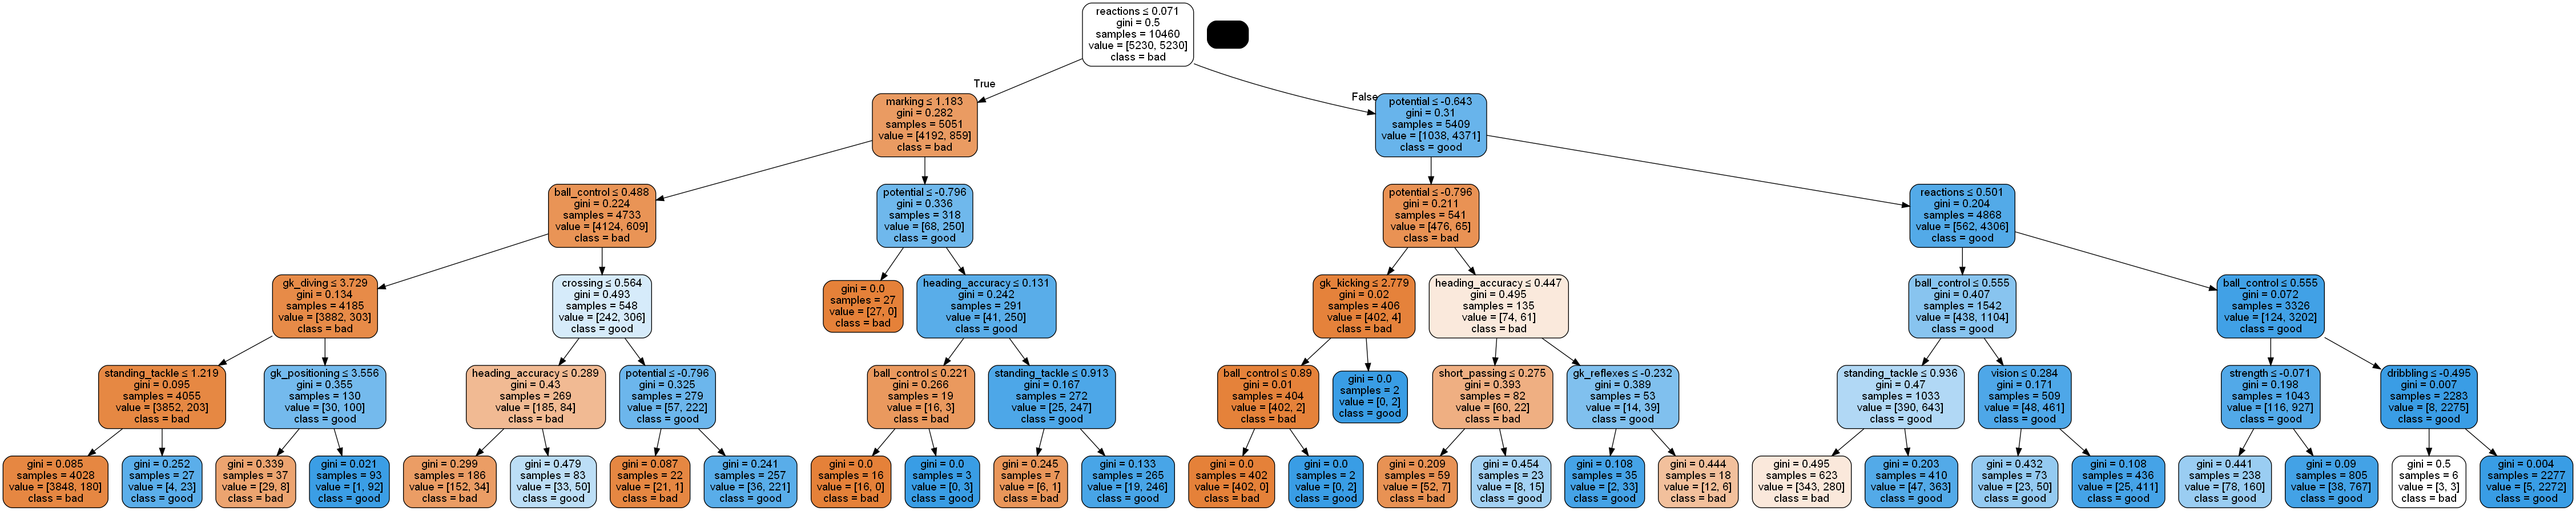

In [28]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
dot_data = export_graphviz(tree, out_file=None,
feature_names=cols, class_names=["bad","good"],
filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

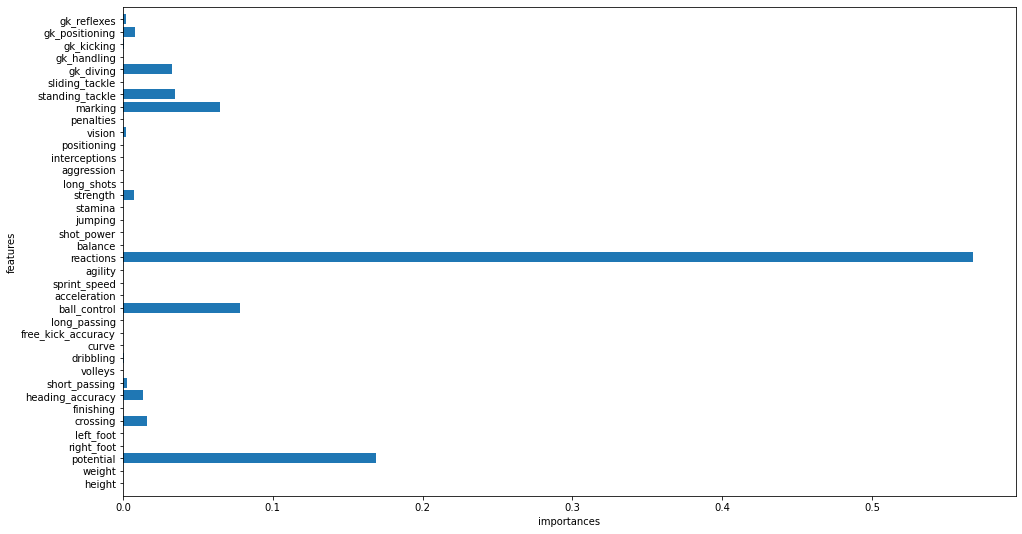

In [29]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 (0 ~ 1 사이의 값 전혀 사용되지 않음 완벽하게 타겟 클래스 예측)
import numpy as np
import matplotlib.pyplot as plt
def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_,
    align='center')
    plt.yticks(np.arange(n_features), cols)
    plt.xlabel("importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
plot_tree(tree)
# : teaching > research

In [30]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('scaler', StandardScaler()),
('clf', RandomForestClassifier(random_state=0)),])
params = {
'clf__max_depth': list(range(3,6)),
'clf__n_estimators': list(range(10,110,10)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)

{'clf__max_depth': 5, 'clf__n_estimators': 100}
0.9407254154888225


In [31]:
scores.append(grid.best_score_)
scores

[0.8893872018040616, 0.8932124910803031, 0.9407254154888225]

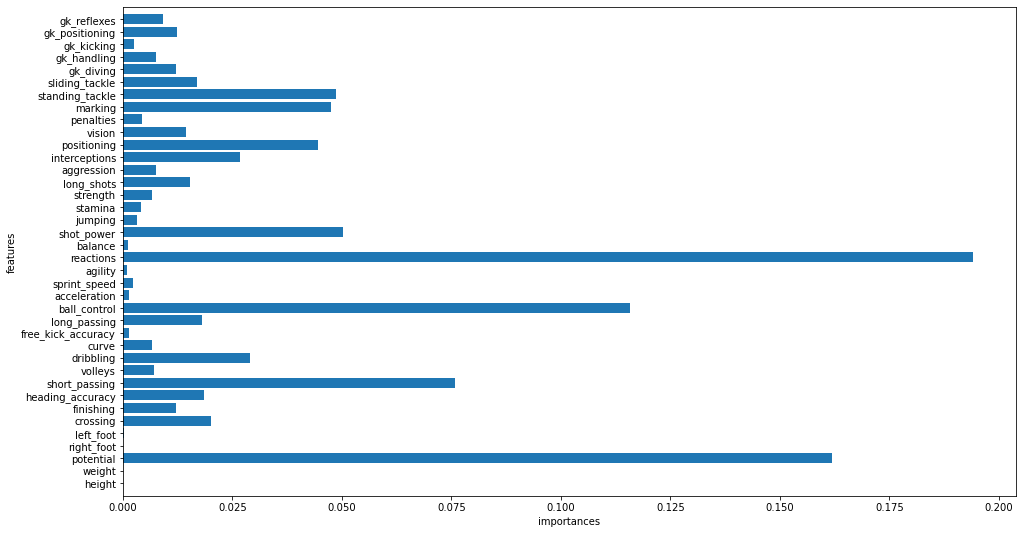

In [32]:
rf=grid.best_estimator_['clf']
plot_tree(rf)
# teaching > research

In [33]:
#knn
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', KNeighborsClassifier()),
])
params = {
'clf__n_neighbors': list(range(1,11)),
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)


{'clf__n_neighbors': 10}
0.8847981818982542


In [34]:
scores.append(grid.best_score_)
scores

[0.8893872018040616,
 0.8932124910803031,
 0.9407254154888225,
 0.8847981818982542]

In [35]:
#인공신경망
from sklearn.neural_network import MLPClassifier
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', MLPClassifier(random_state=0, max_iter=5000)),
])
params = {
'clf__hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
'clf__activation': ['tanh', 'relu'],
'clf__alpha': [0.001, 0.01, 0.1]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)


{'clf__activation': 'tanh', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (100,)}
0.9349897987350003


In [36]:
scores.append(grid.best_score_)
scores

[0.8893872018040616,
 0.8932124910803031,
 0.9407254154888225,
 0.8847981818982542,
 0.9349897987350003]

In [37]:
#svm
from sklearn.svm import SVC
pipe = Pipeline([
('scaler', StandardScaler()),
('clf', SVC(random_state=0)),
])
params = {
'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
'clf__gamma': [0.0001, 0.001, 0.01, 0.1]
}
grid = GridSearchCV(pipe, params, scoring='accuracy', cv=3)
grid.fit(X, y)
print(grid.best_params_)
print(grid.best_score_)


{'clf__C': 100, 'clf__gamma': 0.01}
0.9373802857516894


In [38]:
scores.append(grid.best_score_)
scores

[0.8893872018040616,
 0.8932124910803031,
 0.9407254154888225,
 0.8847981818982542,
 0.9349897987350003,
 0.9373802857516894]

 최적의 알고리즘: RF
 최적의 정확도: 0.9407254154888225


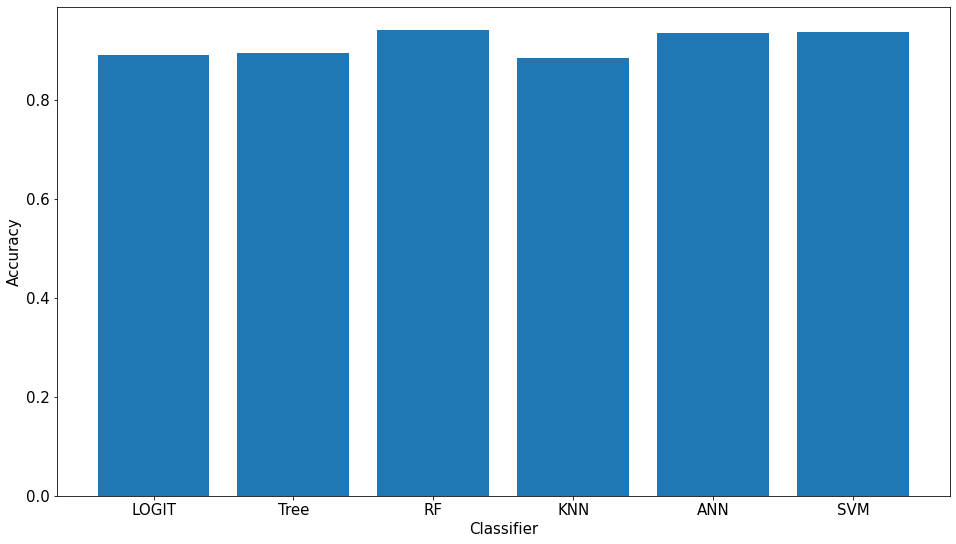

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM']
[0.8893872018040616, 0.8932124910803031, 0.9407254154888225, 0.8847981818982542, 0.9349897987350003, 0.9373802857516894]


In [39]:
#알고리즘별 예측도 그래프
methods=["LOGIT","Tree","RF","KNN","ANN","SVM"]
scores_arr=np.array(scores) #검증용 데이터셋의 정확도
max_rate=np.max(scores_arr) #가장 좋은 정확도
idx=np.argmax(scores_arr) #최대값의 인덱스
print(" 최적의 알고리즘:",methods[idx])
print(" 최적의 정확도:",max_rate) 
plt.rcParams["font.size"]=15
plt.bar(methods, scores_arr)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.show()
print(methods)
print(scores)